In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:51<00:00, 23.6MB/s]
100% 1.06G/1.06G [00:51<00:00, 22.2MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
traindata = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validdata = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['Accuracy']
)

In [ ]:
history = model.fit(traindata,
          epochs=10,
          validation_data=validdata
)

Epoch 1/10
625/625 [==============================] - 75s 119ms/step - loss: 0.6699 - Accuracy: 0.6039 - val_loss: 0.6255 - val_Accuracy: 0.6870
Epoch 2/10
625/625 [==============================] - 75s 120ms/step - loss: 0.6004 - Accuracy: 0.6646 - val_loss: 0.5949 - val_Accuracy: 0.7040
Epoch 3/10
625/625 [==============================] - 75s 119ms/step - loss: 0.5356 - Accuracy: 0.7090 - val_loss: 0.5678 - val_Accuracy: 0.7196
Epoch 4/10
625/625 [==============================] - 75s 120ms/step - loss: 0.4651 - Accuracy: 0.7527 - val_loss: 0.5438 - val_Accuracy: 0.7278
Epoch 5/10
625/625 [==============================] - 75s 119ms/step - loss: 0.4223 - Accuracy: 0.7806 - val_loss: 0.4968 - val_Accuracy: 0.7640
Epoch 6/10
625/625 [==============================] - 75s 119ms/step - loss: 0.3714 - Accuracy: 0.8051 - val_loss: 0.4668 - val_Accuracy: 0.7704
Epoch 7/10
625/625 [==============================] - 75s 119ms/step - loss: 0.3218 - Accuracy: 0.8280 - val_loss: 0.7955 - val_Ac

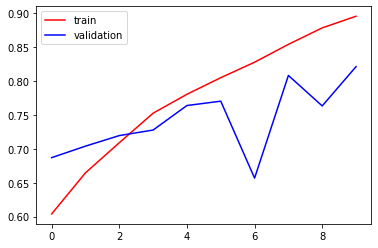

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['Accuracy'],color='red',label='train')
plt.plot(history.history['val_Accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

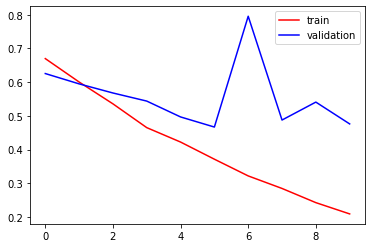

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

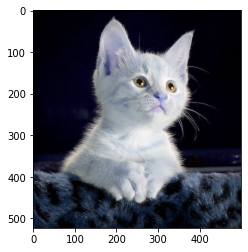

In [ ]:
from keras.preprocessing import image
import cv2

#Input image
img = cv2.imread(r'/content/cat.jpeg')
plt.imshow(img)


In [ ]:
img.shape


(523, 500, 3)

In [ ]:
img = cv2.resize(img,(256,256))

In [ ]:
input = img.reshape((1,256,256,3))

In [ ]:
import numpy as np
img = tf.keras.utils.img_to_array(img)
img = np.expand_dims(img,axis=0)
  
# Result array
result = model.predict(img)
  
#Mapping result array with the main name list
i=0
if(result>=0.5):
  print("Dog")
else:
  print("Cat")

1/1 [==============================] - 0s 223ms/step
Cat
